In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
train_dir = 'chest_xray/train/'
val_dir = 'chest_xray/val/'
test_dir = 'chest_xray/test'

In [3]:
batch_size = 16
epochs = 20
img_height,img_width = 150,150
nb_train_samples = 5217
nb_validation_samples = 17

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height,img_width),
                                               batch_size=batch_size,
                                               class_mode='binary')

val_data = test_datagen.flow_from_directory(val_dir,
                                               target_size=(img_height,img_width),
                                               batch_size=batch_size,
                                               class_mode='binary')

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(img_height,img_width),
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width,img_height,3), activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 64)       

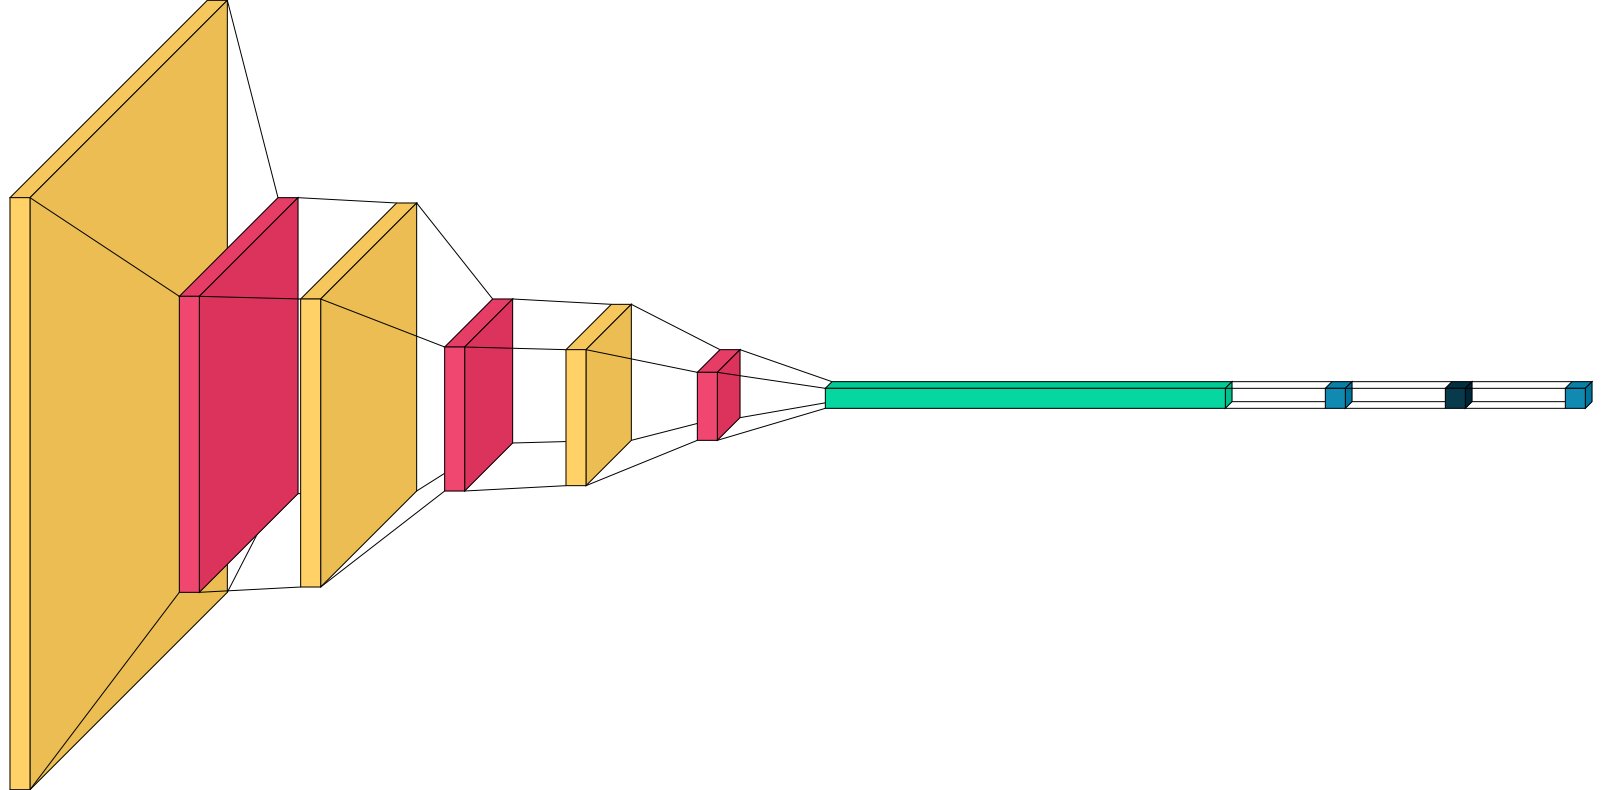

In [12]:
import visualkeras
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 32)

visualkeras.layered_view(model, spacing=100)

In [7]:
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='rmsprop')

In [8]:
mc = ModelCheckpoint(
    'pnemonia_model_mc.h5',
    monitor="val_loss",
    verbose=1,
    save_best_only=False,
)

In [9]:
history = model.fit(train_data,
                  epochs=epochs,
                  steps_per_epoch = nb_train_samples//batch_size,
                  validation_data=val_data,
                  validation_steps=nb_validation_samples//batch_size,
                 )
model.save('pneumonia_model_full.h5')

Epoch 1/20


326/326 [==============================] - 101s 307ms/step - loss: 0.4368 - accuracy: 0.8142 - val_loss: 0.3709 - val_accuracy: 0.8125
Epoch 2/20
326/326 [==============================] - 101s 310ms/step - loss: 0.2787 - accuracy: 0.8867 - val_loss: 0.7328 - val_accuracy: 0.6875
Epoch 3/20
326/326 [==============================] - 99s 304ms/step - loss: 0.2337 - accuracy: 0.9103 - val_loss: 0.7814 - val_accuracy: 0.7500
Epoch 4/20
326/326 [==============================] - 99s 304ms/step - loss: 0.2033 - accuracy: 0.9281 - val_loss: 0.4353 - val_accuracy: 0.8750
Epoch 5/20
326/326 [==============================] - 99s 303ms/step - loss: 0.1896 - accuracy: 0.9327 - val_loss: 0.6503 - val_accuracy: 0.6875
Epoch 6/20
326/326 [==============================] - 104s 319ms/step - loss: 0.1966 - accuracy: 0.9304 - val_loss: 0.7751 - val_accuracy: 0.7500
Epoch 7/20
326/326 [==============================] - 96s 295ms/step - loss: 0.1776 - accuracy: 0.9362 - val_loss: 0.9944 - v

C:\Users\zakza\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


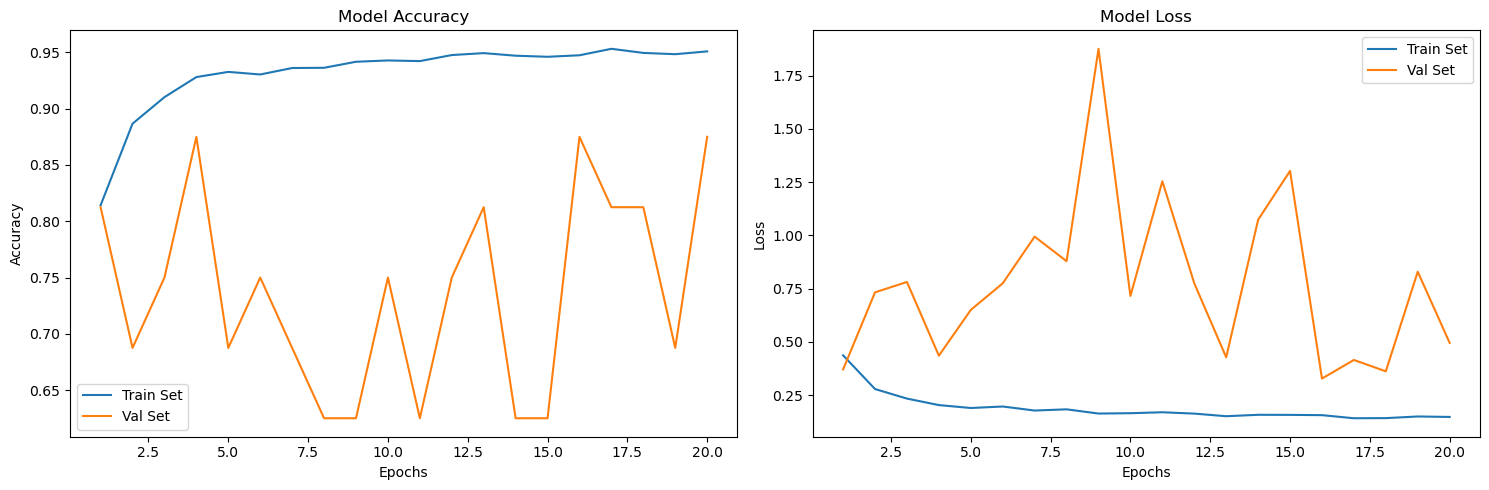

In [10]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [11]:
scores = model.evaluate_generator(test_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

C:\Users\zakza\AppData\Local\Temp\ipykernel_28828\3593903191.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_data)



accuracy: 90.06%
